In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#Importing account info, customer info, transaction info, stock info
df_acc = pd.read_csv('../계좌정보.csv')
df_cus = pd.read_csv('../고객정보.csv')
df_trn = pd.read_csv('../국내주식매매정보.csv')
df_tic = pd.read_csv('../종목정보.csv')

In [4]:
#Preprocessing the imported data
df_num_trn = df_trn.copy().groupby('act_id').count() #number of transactions in 2020 for each account
df_num_trn['sum_num_trn'] = df_num_trn['orr_dt']

df_acc_trn = df_acc.join(df_num_trn['sum_num_trn'], on='act_id')
df_acc_trn = df_acc_trn.copy()[df_acc_trn['sum_num_trn'].notnull()]
df_acc_trn = df_acc_trn.groupby('cus_id').sum()

df_cus_trn = df_cus.join(df_acc_trn['sum_num_trn'], on='cus_id')
df_cus_trn = df_cus_trn[(df_cus_trn['sum_num_trn'].notnull()) & (df_cus_trn['tco_cus_grd_cd'] != '_ ')]

In [5]:
# Making age bin
r = np.array([0, 24, 39, 54, 70])
df_cus_trns = df_cus_trn.drop(columns=['ivs_icn_cd', 'zip_ctp_cd'])
df_cus_trns['cus_age'] = pd.cut(df_cus_trn['cus_age'], r)
df_cus_trns.head()

,cus_id,sex_dit_cd,cus_age,tco_cus_grd_cd,sum_num_trn
0,4d8b277319e2b9702558e2051e3921b7577b8f91af1c57...,1,"(54, 70]",04,43.0
1,6dd7a26cd20b8bf9f1a21112cdf6484f8d39941e927d5c...,1,"(54, 70]",01,1.0
4,521ed7bcd25272bedf5c8b539873fb342e318b22b4fcaf...,1,"(54, 70]",03,1.0
5,ad142f0657873f53455432ff4b336e53dc8905b8e70698...,1,"(54, 70]",02,4.0
6,2cdbbc8097fbd2abbf4dcc8779d0b742ba7a13e5211155...,1,"(54, 70]",09,4.0


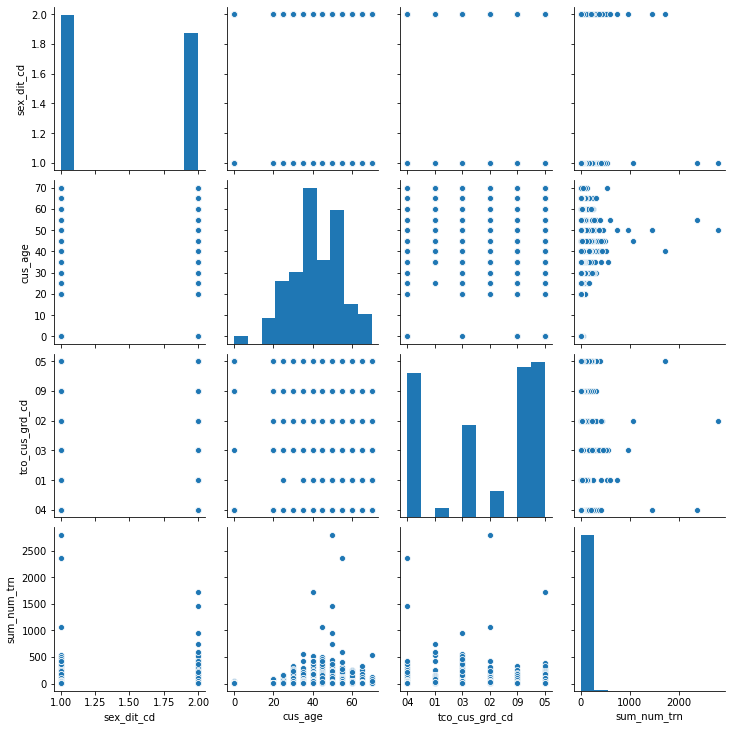

In [6]:
#Making 2D Matrix scatter plot to find any pattern
sns.pairplot(df_cus_trn[['sex_dit_cd', 'cus_age', 'tco_cus_grd_cd', 'sum_num_trn']])

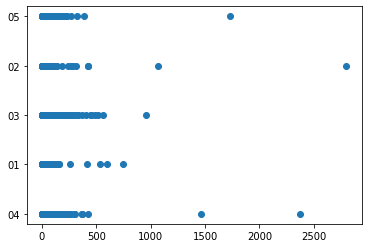

In [39]:
# Checking specific plot to get a closer look
plt.scatter(x= df_cus_trn['sum_num_trn'], y= df_cus_trn['tco_cus_grd_cd'])

In [86]:
# Dropping columns in order to do preprocessing
df_cus_trnss = df_cus_trn.drop(columns=['ivs_icn_cd'])
df_cus_copy = df_cus_trnss.copy()
df_cus_copy.head()

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,sum_num_trn
0,4d8b277319e2b9702558e2051e3921b7577b8f91af1c57...,1,70,29,04,43.0
1,6dd7a26cd20b8bf9f1a21112cdf6484f8d39941e927d5c...,1,70,27,01,1.0
4,521ed7bcd25272bedf5c8b539873fb342e318b22b4fcaf...,1,70,41,03,1.0
5,ad142f0657873f53455432ff4b336e53dc8905b8e70698...,1,70,30,02,4.0
6,2cdbbc8097fbd2abbf4dcc8779d0b742ba7a13e5211155...,1,70,11,09,4.0


In [87]:
from sklearn import preprocessing

#Data preparation by label encoder
le = preprocessing.LabelEncoder()
bank_cus = df_cus_trnss.apply(le.fit_transform)
bank_cus.head()

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,sum_num_trn
0,1538,0,11,5,3,42
1,2185,0,11,3,0,0
4,1627,0,11,9,2,0
5,3492,0,11,6,1,3
6,879,0,11,1,5,3


In [88]:
#Making sure dataset have no NULL values
bank_cus.isnull().sum()

#Did not do further after sklearn preprocessing with label encoder due to the fact that values were already numerical

cus_id            0
sex_dit_cd        0
cus_age           0
zip_ctp_cd        0
tco_cus_grd_cd    0
sum_num_trn       0
dtype: int64